In [31]:
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib as mpl

In [3]:
%matplotlib inline

In [4]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook')

In [5]:
### Variable definitions for hubble constant, effective potential, etc...
ho = 72.5
N_eff = 3.04
O_gamma = (2.469e-5)
h = ho/100.0

In [226]:
### Choose one of the models below
### ov is a given dark energy constant, and om is a given matter constant
### NCr is a constant used to nullify a parametric density for certain models, i.e. Omega_rad * NCr

# model, om, ov, NCr, NCk = 'Einstein de-Sitter', 1.0, 0.0, 0.0, 1.0
# model, om, ov, NCr, NCk = 'Low Density', .05, 0.0, 1.0, 1.0
# model, om, ov, NCr, NCk = 'High Lambda', 0.2, 0.8, 1.0, (0.0)

# model, om, ov, NCr, NCk = 'O_m = .1, Omega_lamda = .9', 0.1, 0.9, 1.0, (0.)
# model, om, ov, NCr, NCk = 'O_m = .2, Omega_lamda = .8', 0.2, 0.8, 1.0, (0.)
# model, om, ov, NCr, NCk = 'O_m = .3, Omega_lamda = .7', 0.3, 0.7, 1.0, (0.)
# model, om, ov, NCr, NCk = 'O_m = .4, Omega_lamda = .6', 0.4, 0.6, 1.0, (0.)
# model, om, ov, NCr, NCk = 'O_m = .5, Omega_lamda = .5', 0.5, 0.5, 1.0, (0.)
# model, om, ov, NCr, NCk = 'O_m = .6, Omega_lamda = .4', 0.6, 0.4, 1.0, (0.)

In [189]:
### Defining Functions
def OM(z, om):
    return om * (1.0 + z)**3.0

### OR returns the z dependent radiation function, O_R is the radiation density constant
O_R = NCr * O_gamma * (1.0 / (h**2.0)) * (1.0 + (0.2271)*N_eff)
# print (O_R)
def OR(z, ho):
    return O_R * (1 + z)**4.0

### Ok returns the z dependent curvature function, O_k is the curvature density constant, 
def Ok(z, om, ov, ho):
    O_k = 1 - om - ov - O_R
    return NCk * O_k * (1 + z)**2.0

### O_de returns the input value of the dark energy density,
def O_de(z, ov):
    lamd = []
    for x in z:
        lamd.append(ov)
    return lamd

In [229]:
### Calculate where matter and radiation densities intersect
Intersect = (om/O_R) - 1
print (Intersect)

### Value of OM at the redshift of 
Omega_alpha = OM(Intersect, om)
print (Omega_alpha)

### Temp variable for z = np.linspace function
v = Intersect + 500

3777.2509880749008
16180564481.466694


Point of Intersection: z = 3777.2509880749008


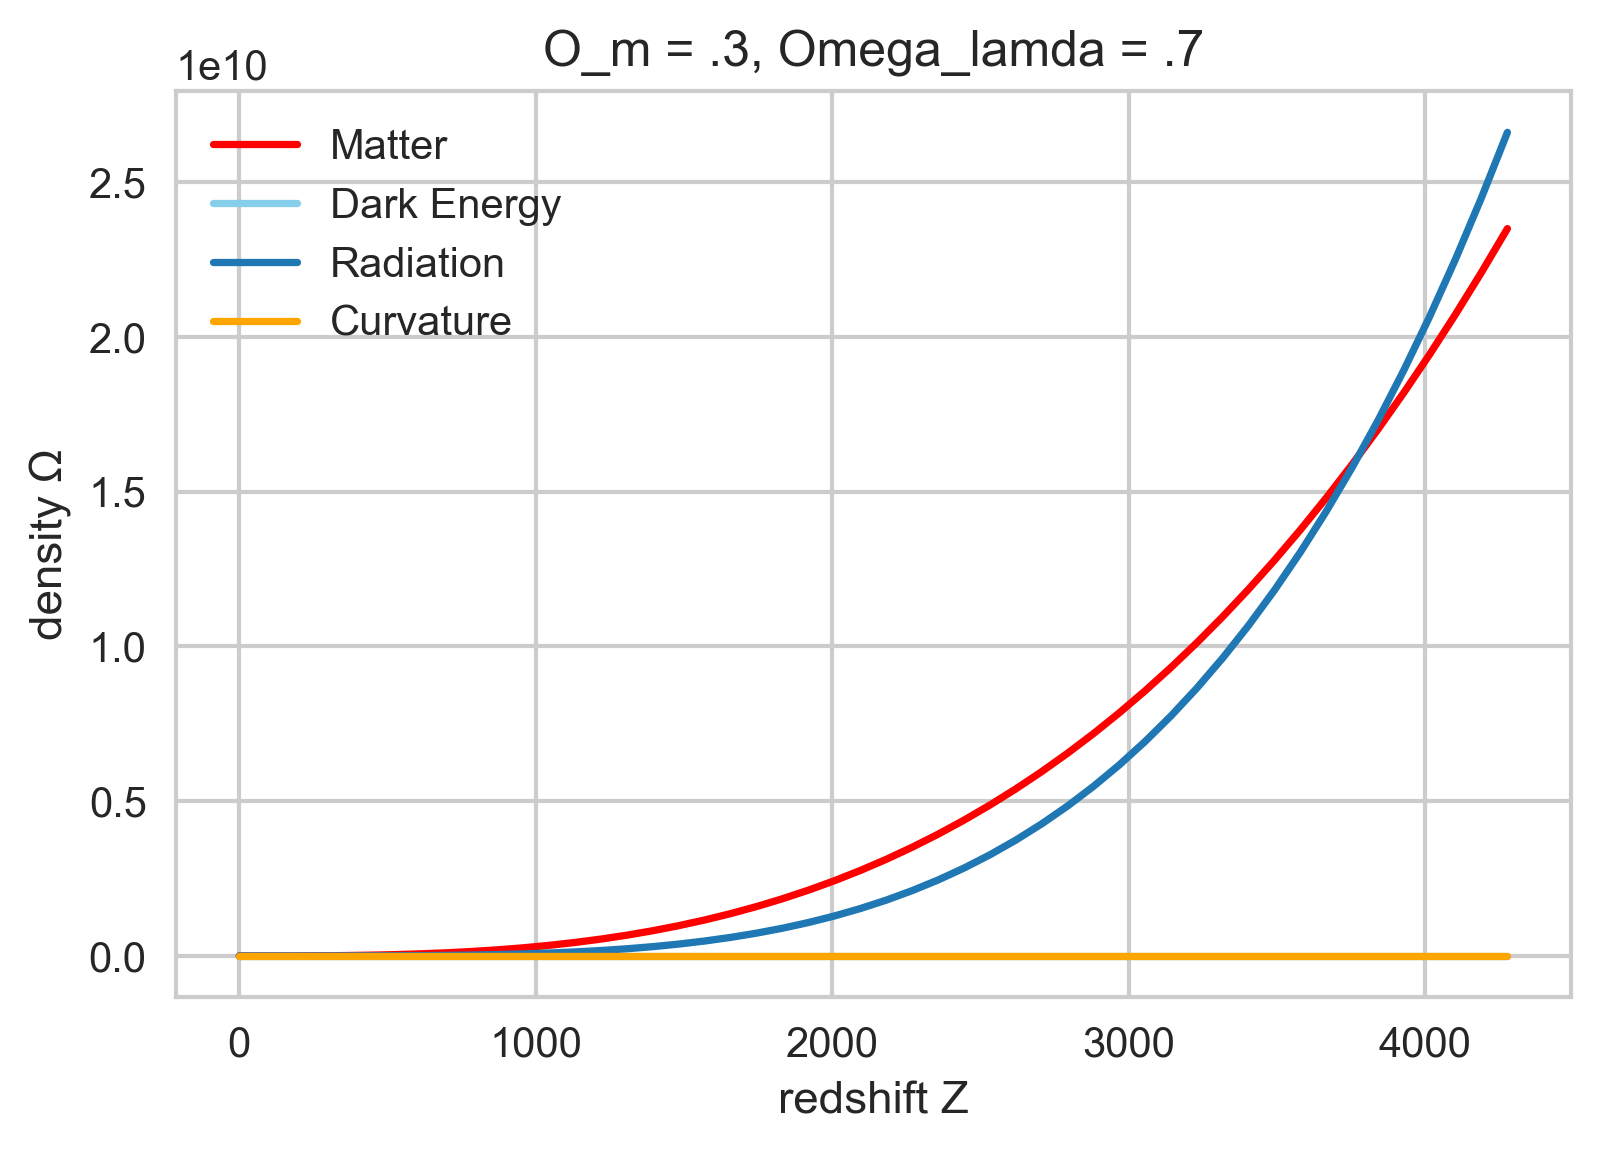

In [231]:
### Plots of Density evolutions over redshift

### Defining linear space for plotting
z = np.linspace(0,v,50) 

matter = OM(z, om)
curvature = Ok(z, om, ov, O_R)
radiation = OR(z, ho)
dark_e = O_de(z, ov)

plt.plot(z, matter, label = 'Matter', color = 'r')
plt.plot(z, dark_e, label = 'Dark Energy', color = 'skyblue')
plt.plot(z, radiation, label = 'Radiation')
plt.plot(z, curvature, label = 'Curvature', color = 'orange')

plt.legend()
plt.ylabel('density Ω')
plt.xlabel('redshift Z')
plt.title(model)
# plt.text('Omega_m = Omega_rad at {}'.format(Intersect))

# import matplotlib as mpl
# mpl.rcParams['savefig.dpi'] = 300
# mpl.rcParams['figure.dpi'] = 300

print ('Point of Intersection: z = {}'.format(Intersect))

Text(0.5,1,'redshift of matter radiation equality')

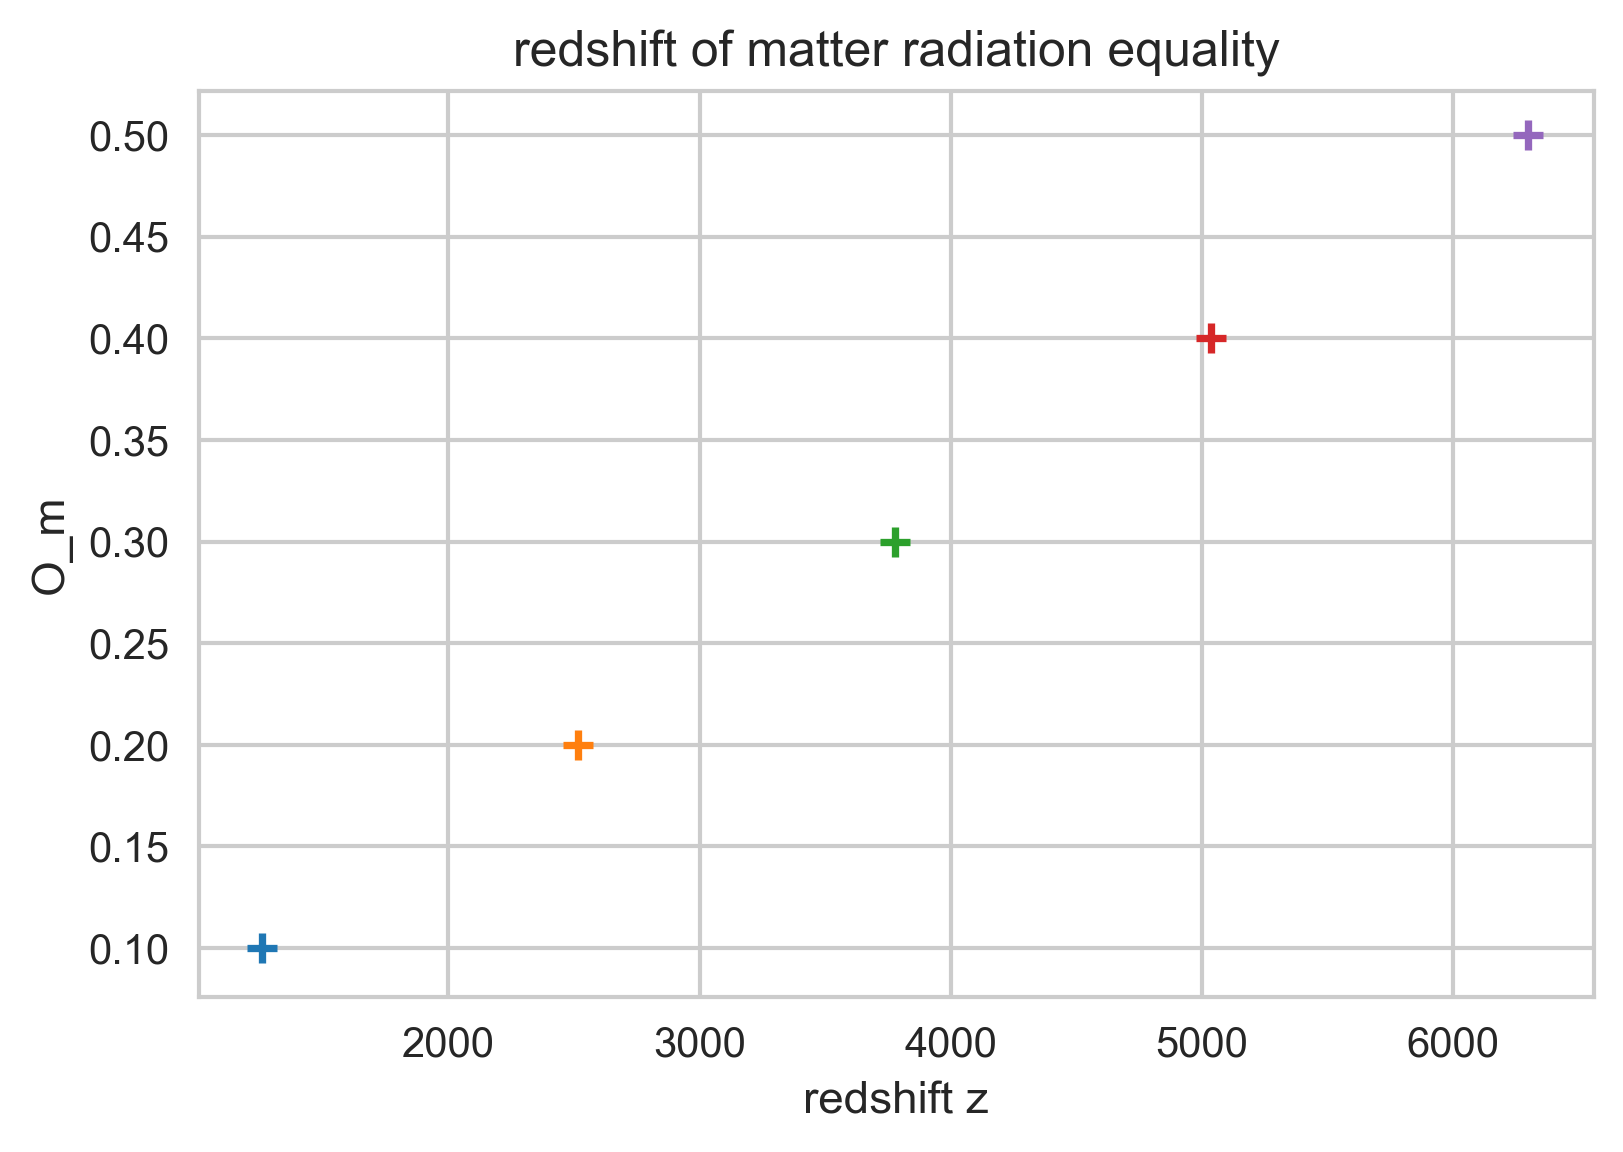

In [232]:
### Plot of values at points of intersection

### Building dictionaries
Omega_m_var = [0.1,0.2,0.3,0.4,0.5]
dict1 = {}
dict2 = {}
dict3 = {}

for x in Omega_m_var:
    y = (x/O_R) - 1
    new_value = OM(y,x)
    dict1[y] = new_value
    dict2[y] = x
    dict3[new_value] = x
    
# print (dict1)
# print (dict2)
# print (dict3)

### Plot of ((OM(z_eq, om)), z_eq)
# for key in dict1:
#     x = key
#     y = dict1[key]
#     plt.scatter(x,y, marker = '+')

### Plot of ((OM(z_eq,om),om)
# for key in dict3:
#     x = key
#     y = dict3[key]
#     plt.scatter(x,y,

### Plot of (om, z_eq)
for key in dict2:
    x = key
    y = dict2[key]
    plt.scatter(x,y, marker = '+')
        
plt.ylabel('O_m')
plt.xlabel('redshift z')
plt.title('redshift of matter radiation equality')

Text(0.5,1,'E(z) vs. redshift z')

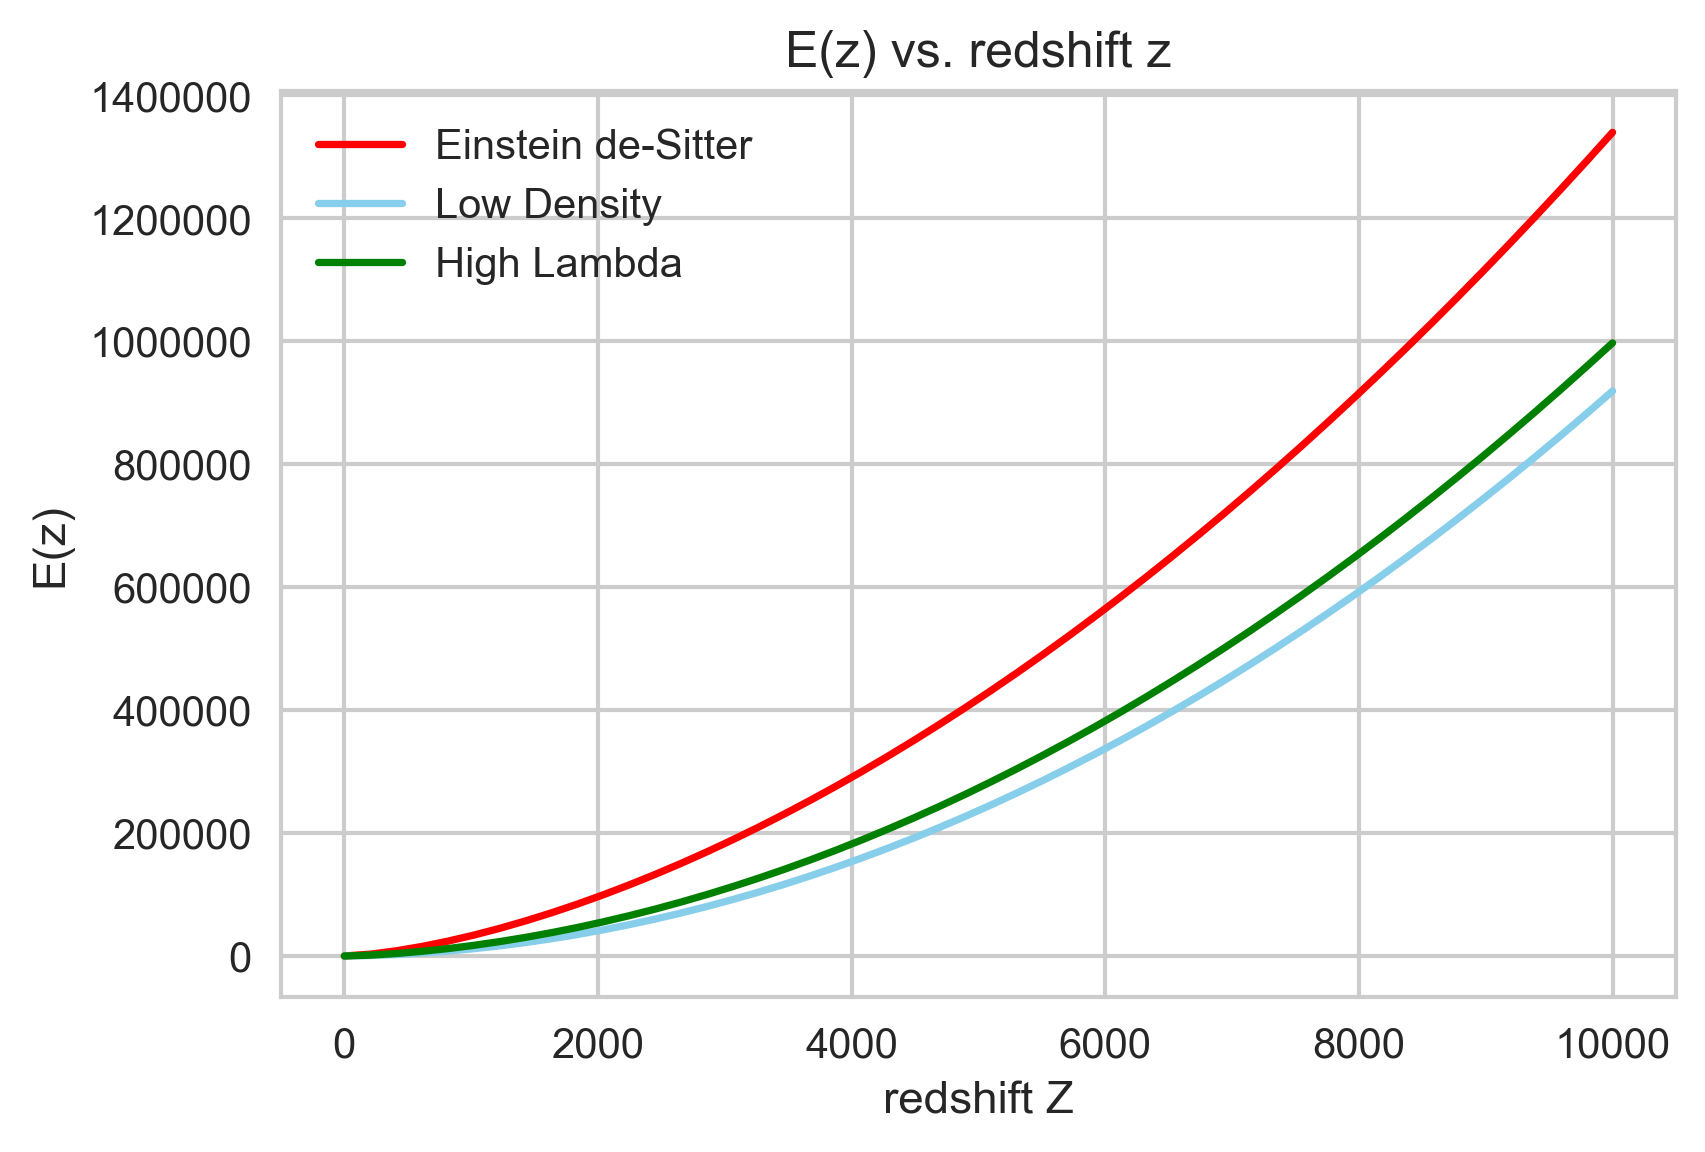

In [234]:
### Defining E(z) for different models and plotting them together
z = np.linspace(0,10000,50) 

def Ez1(z, ho):
    model, om, ov, NCr, NCk = 'Einstein de-Sitter', 1.0, 0.0, 0.0, 1.0
    matter = OM(z, om)
    radiation = OR(z, ho)
    curvature = Ok(z, om, ov, O_R)
    dark_energy = O_de(z, ov)
    
    E1_squared = matter + radiation + curvature + dark_energy
    return np.sqrt(E1_squared)

def Ez2(z, ho):
    model, om, ov, NCr, NCk = 'Low Density', .05, 0.0, 1.0, 1.0
    matter = OM(z, om)
    radiation = OR(z, ho)
    curvature = Ok(z, om, ov, O_R)
    dark_energy = O_de(z, ov)
    
    E2_squared = matter + radiation + curvature + dark_energy
    return np.sqrt(E2_squared)

def Ez3(z, ho):
    model, om, ov, NCr, NCk = 'High Lambda', 0.2, 0.8, 1.0, (0.)
    matter = OM(z, om)
    radiation = OR(z, ho)
    curvature = Ok(z, om, ov, O_R)
    dark_energy = O_de(z, ov)
    
    E_squared = matter + radiation + curvature + dark_energy
    return np.sqrt(E_squared)

ez1 = Ez1(z, ho)
ez2 = Ez2(z, ho)
ez3 = Ez3(z, ho)

plt.plot(z, ez1, label = 'Einstein de-Sitter', color = 'r')
plt.plot(z, ez2, label = 'Low Density', color = 'skyblue')
plt.plot(z, ez3, label = 'High Lambda', color = 'g')

plt.legend()
plt.ylabel('E(z)')
plt.xlabel('redshift Z')
plt.title('E(z) vs. redshift z')

In [235]:
# def luminosity_distance():
    